# Numpy Hızlı Tekrar

<a href="https://colab.research.google.com/drive/1agCWwlFuK9Xay1VQdIbsPrG59rIRcubd?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpy Hızlı Tekrar

Bu defter numpy kütüphanesinin tanıtımını hedefler. [Numpy](https://docs.scipy.org/doc/numpy/genindex.html), dizi işlemleri için tercih edilen bir kütüphane olması sebebiyle sayısal sinyal işleme işlemlerinde sık kullanılır. 


Numpy kütüphanesini aşağıdaki gibi yükleyebiliriz.

In [2]:
import numpy as np

### Dizi tanımlama ve dizi temel özellikleri

Numpy kütüphanesinin temel veri sınıfı ndarray'dir. Örnekle başlayalım. Oluşturduğumuz dizilerin özellikleri incelemek için bir fonksiyon (ozellikleri_yazdir()) tanımlayıp kullanacağız. 

Bir numpy dizisinin bir listeden ilk temel farkı elemanların türü açısından homojen olmasıdır; Listeye farklı türde (metin, bool, sayı,...) elemanlar yerleştirebilirken numpy dizisine sadece bir türde elemanlar yerleştiriyor olacağız. Diziyi tanımlarken numpy bizim için uygun türü seçecek (ihtiyaç duyduğumuzda (örneğin hafızayı daha verimli kullanmak istediğimizde) kendimiz de belirleyebiliriz).

In [19]:
def ozellikleri_yazdir(x):
  print('dizi içeriği =\n', x, '\n')
  print('Dizi türü: ', type(x), ', .dtype = ',x.dtype, ', .ndim = ',x.ndim, ', .size = ', x.size)  
  print('.shape = ',x.shape)
  print()
#-----------------  

#Tek boyutlu dizi tanımlama
ornek_dizi = np.array([1, 2, 3, 4.5])
ozellikleri_yazdir(ornek_dizi)

dizi içeriği =
 [1.  2.  3.  4.5] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  float64 , .ndim =  1 , .size =  4
.shape =  (4,)



Oluşturduğumuz dizinin içerisinde tam sayılar ve bir ondalık sayı bulunmaktaydı. Dizinin kullandığı veri türü için dtype =  float64 seçildi. Elemanlardan birisini metin olarak girmeyi deneyelim:

In [20]:
ornek_dizi = np.array([1, 2, 3, 'test'])
ozellikleri_yazdir(ornek_dizi)

dizi içeriği =
 ['1' '2' '3' 'test'] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  <U21 , .ndim =  1 , .size =  4
.shape =  (4,)



Tüm elemanların metin türüne dönüştürüldüğünü ve veri türünün karakter dizisi olarak seçildiğini görüyoruz. (dtype türleri için [bakınız](https://numpy.org/doc/stable/reference/arrays.dtypes.html)).

Kendimiz belirlemek istediğimizde alttaki örnekteki gibi sona dtype türünü tanımlayabiliriz.

In [21]:
ornek_dizi = np.array([1, 2, 3, 4.0], dtype='uint8')
ozellikleri_yazdir(ornek_dizi)

dizi içeriği =
 [1 2 3 4] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  uint8 , .ndim =  1 , .size =  4
.shape =  (4,)



np.array() fonksiyonu, bu örnekte gerekli dönüşümü yaparak elemanları uint8 türünde kaydetti. Sondaki gibi tür tercihini belirtmediğinizde veri türü float64 olarak seçilecek (tüm elemanlar ondalık sayıya dönüştürülecek) ve uint8'e göre hafızada 8 kat daha fazla yer tutan bir dizimiz olacaktır.


In [22]:
ornek_dizi = np.array([1, 2, 3, 4.0])
ozellikleri_yazdir(ornek_dizi)

dizi içeriği =
 [1. 2. 3. 4.] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  float64 , .ndim =  1 , .size =  4
.shape =  (4,)



Kompleks sayılar içeren bir dizi oluşturmak istersek:

In [28]:
ornek_dizi = np.array( [ [1,2], [3,4] ], dtype=complex )
ozellikleri_yazdir(ornek_dizi)

dizi içeriği =
 [[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  complex128 , .ndim =  2 , .size =  4
.shape =  (2, 2)



Hafızada kaplanan yerin problem olduğu noktaya gelinceye kadar bu detayları gözardı edelim ve tür seçme işini numpy'a bırakalım.

List varken neden numpy-array kullanalım? Birçok pratik neden var.  Nedenlerden birisi hız. Aşağıda, aynı işlemi (1'den 1 milyona kadar sayılar toplamı) liste kullanarak ve numpy-array kullanarak yapan kod örnekleri var. 

*%timeit* işlemin aldığı ortalama süreyi hesaplamak için defalarca çalıştırıp, toplam süreyi tekrar çalıştırma sayısına bölerek elde ettiği ortalama süreyi ekrana yazdıracak. Liste kullanarak ve numpy-array kullanarak yapılan işlemler için harcanan süreleri karşılaştırınız. 

In [11]:
# Büyük bir list için toplama işlemi hızını kontrol edelim
test_list = list(range(1000000))
print('Liste kullanılarak harcanan süre:')
%timeit sum(test_list)

Liste kullanılarak harcanan süre
6.59 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
# Büyük bir ndarray için toplama işlemi hızını kontrol edelim
test_nparray = np.array(test_list)
print('Numpy-dizisi kullanılarak harcanan süre:')
%timeit np.sum(test_nparray)

Numpy-dizisi kullanılarak harcanan süre
379 µs ± 8.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Aynı içerikli numpy-array ile toplama işleminin çok daha hızlı gerçekleştiğini görüyoruz. 

#### Düzenli artan/azalan elemanlar içeren dizilerin oluşturulması

Birçok uygulamada bir sayıdan diğerine kadar artan değerleri içeren diziler oluşturmaya ihtiyaç duyarız. Örneğin 10 boyutlu bir kolleksiyonun öğelerine erişmek için endeksler dizisi oluşturmak isteyebilirsiniz. Alttaki gibi yapabilirsiniz:

In [42]:
endeksler = np.arange(10)
endeksler

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

[numpy.arange() dökümantasyonunda](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) görebileceğiniz gibi .arange() girdi olarak $[baslangıç] bitiş,[adım]$ bilgilerini alıyor. Köşeli parantez içerisindeki girdiler opsiyonel. Verilmedikleri durumda $baslangıç = 0$, $adım = 1$ kabul ediliyor. $Bitiş$ değeri diziye dahil edilmiyor. Örnekleri inceleyiniz.

In [46]:
# 5-10 arası sayılar (bitiş hariç)
np.arange(5, 10) 

array([5, 6, 7, 8, 9])

In [43]:
# 5-50 arası sayılar, 10'luk adımlarla
np.arange(5, 50, 10) 

array([ 5, 15, 25, 35, 45])

In [44]:
# 30-20 arası sayılar, -1'luk adımlarla
np.arange(30, 20, -1) 

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21])

### Çok boyutlu diziler

Yukarıdaki örneklerimiz tek boyutlu idi (özelleklier arasında $.ndim = 1$ olarak gösteriliyordu). 


Çok boyutlu dizileri çok farklı şekillerde yaratabilirsiniz. Altta ilk örnekte tüm elemanlar girilerek, ikinci örnekte önce tek boyutlu bir dizi yaratılıp daha sonra reshape() fonksiyonu ile iki boyutlu diziye dönüştürülerek diziler oluşturuluyor.

In [23]:
# İki boyutlu dizi oluşturma örnekleri
ornek_dizi1 = np.array([[1.0, 2, -1],[3, 4, -2]])
ozellikleri_yazdir(ornek_dizi1)

ornek_dizi2 = np.arange(15).reshape(3, 5)
ozellikleri_yazdir(ornek_dizi2)

dizi içeriği =
 [[ 1.  2. -1.]
 [ 3.  4. -2.]] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  float64 , .ndim =  2 , .size =  6
.shape =  (2, 3)

dizi içeriği =
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

Dizi türü:  <class 'numpy.ndarray'> , .dtype =  int64 , .ndim =  2 , .size =  15
.shape =  (3, 5)



$ndim$ (number of dimensions) özelliği 2 değerini aldı. $size$ eleman sayısını, $shape$ ise oluşturduğumuz matrisin boyutlarını taşıyor.

Elemanlara erişmek istediğimizde liste elemanlarına ulaşırken kullandığımız köşeli parantez içerisinde endeks kullanacağız. Önce tek boyutlu dizide örnek görelim:

In [29]:
ornek_dizi = np.array([12, 24, 36])
# 1 endeksli elemanı (dizinin 2. elemanı) yazdıralım
print(ornek_dizi[1])

24


İki ve daha fazla boyutlu diziler *dizi-dizisi* olarak organize olmuşlardır ve temel öğe satırdır. Alttaki örneği inceleyiniz.

In [25]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('a =\n', a, '\n')
print('ilk satır: a[0] = ', a[0])
print('ikinci satır: a[1] = ', a[1])
print('ikinci satır, birinci sütun: a[1, 0] = ', a[1, 0])

a =
 [[1 2 3]
 [4 5 6]] 

ilk satır: a[0] =  [1 2 3]
ikinci satır: a[1] =  [4 5 6]
ikinci satır, birinci sütun: a[1, 0] =  4


İterasyon ile iki boyutlu dizi öğelerine erişmek istediğinizde ilk iterasyonun $s$ değişkeni içerisine satırları döndüreceğini, daha sonra içteki döngüde satırdan tekil elemanların $d$ değişkeni içerisine kopyalandığını göreceksiniz.

In [27]:
for s in a:
  print('s = ', s)
  for d in s:
    print('d = ', d)

s =  [1 2 3]
d =  1
d =  2
d =  3
s =  [4 5 6]
d =  4
d =  5
d =  6


### Boyut bilgisine erişim ve değiştirme

Zaman zaman dizilerin (örneğin bir fonksiyonun aldığı dizinin) boyutlarına erişmeye ihtiyaç duyacaksınız. Bazen de değiştirmeniz gerekecek. Örnek görelim.

In [32]:
a = np.array([[15, 25, 35],[40, 50, 60]])
print(a)
print("Önceki boyut: a.shape = ", a.shape)

print('.reshape(3,2) işlemi sonrasında')
a = a.reshape(3,2)
print(a)
print('Sonraki boyut:', a.shape)

[[15 25 35]
 [40 50 60]]
Önceki boyut: a.shape =  (2, 3)
.reshape(3,2) işlemi sonrasında
[[15 25]
 [35 40]
 [50 60]]
Sonraki boyut: (3, 2)


Çok boyutlu dizileri tek boyutluya indirme görece sık yapılan bir işlemdir, alttaki fonksiyonlardan birini kullanabilirsiniz. 

In [33]:
print(a.flatten('C')) # satıra göre
print(a.ravel()) # alternatif
print(a.flatten('F')) # sütuna göre

[15 25 35 40 50 60]
[15 25 35 40 50 60]
[15 35 50 25 40 60]


Makine öğrenmesi ve sinyal işlemede sıkça içi sıfırla, 1'le veya rasgele sayılarla dolu diziler oluşturmaya ihtiyaç duyarız. Örnekler görelim.

In [36]:
# Sıfırla dolu dizi oluşturma
a = np.zeros((3,4));
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [37]:
# Birlerle dolu, eleman türü int16 olan üç boyutlu dizi oluşturma 
a = np.ones((2,3,4), dtype=np.int16)
a

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [38]:
# Diyagonal matris oluşturma
d = np.eye(5)
d

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [39]:
# Rasgele sayılar içeren dizi oluşturma
a = np.random.random((3,3))
a

array([[0.85589059, 0.72507391, 0.39800484],
       [0.93671198, 0.56007873, 0.62279103],
       [0.48448705, 0.93982386, 0.84724831]])

### Numpy dizi işleme fonksiyonları

In [40]:
# Min, max, mean, sum, ... gibi işlemleri dizinin üzerinden çağırarak 
#  veya fonksiyon içerisine diziyi göndererek gerçekleştirebilirsiniz
print('Min: ',a.min(), ', Max: ',a.max(), ', Mean: ',a.mean())
print('Min: ',np.min(a), ', Max: ',np.max(a), ', Mean: ',np.mean(a))

Min:  0.3980048386479783 , Max:  0.9398238627162854 , Mean:  0.707790034388831
Min:  0.3980048386479783 , Max:  0.9398238627162854 , Mean:  0.707790034388831


In [41]:
# Eksponansiyel ve kare kök alma örnekleri
print('np.exp(a) = ',np.exp(a),'\n')
print('np.sqrt(a) = ',np.sqrt(a))

np.exp(a) =  [[2.35346943 2.06488372 1.48885123]
 [2.55157797 1.75081034 1.86412361]
 [1.62334211 2.55953055 2.33321771]] 

np.sqrt(a) =  [[0.92514355 0.85151272 0.63087625]
 [0.96783882 0.74838408 0.7891711 ]
 [0.69605104 0.96944513 0.92046092]]


## İçeriğe erişim (İng: [slicing](https://towardsdatascience.com/slicing-numpy-arrays-like-a-ninja-e4910670ceb0))


Aşağıdaki şekilde erişim örneklerini inceleyiniz ve alttaki uygulamayı yapınız. 

Kaynak: https://www.geeksforgeeks.org/numpy-indexing/

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Numpy1.jpg)

**UYGULAMA**:


Alttaki dizide renklendirilerek işaretlenen verileri yazdırmak için gerekli kod satırlarını yazınız.

<img src="https://ds100.org/fa17/assets/notebooks/numpy/guessing_game.png"/>

In [47]:
# Uygulamayı bu dizi üzerinde yapınız
arr = np.arange(12).reshape(4,3)
print('dizi =\n', arr, '\n')

# Kodunuzu buraya yazınız

dizi =
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 



ÇÖZÜM:

In [48]:
#@title
# Diyezleri silerek kodu çalıştırabilirsiniz
# print('A =\n',arr[0,:],'\n---')
# print('B =\n',arr[:,0],'\n---')
# print('C =\n',arr[-2:,-2:],'\n---')
# print('D =\n',arr[::2,:],'\n---')
# print('E =\n',arr[:2,:2],'\n---')
# print('F =\n',arr[:,::2],'\n---')
# print('G =\n',arr[1::2,:],'\n---')
# print('H =\n',arr[:2,1:],'\n---')

A =
 [0 1 2] 
---
B =
 [0 3 6 9] 
---
C =
 [[ 7  8]
 [10 11]] 
---
D =
 [[0 1 2]
 [6 7 8]] 
---
E =
 [[0 1]
 [3 4]] 
---
F =
 [[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]] 
---
G =
 [[ 3  4  5]
 [ 9 10 11]] 
---
H =
 [[1 2]
 [4 5]] 
---


Bazen dizi elemanlarına erişmek için kullanacağınız endeksleri başka bir dizi içerisinde tutmanız gerekecek. Örnek:

In [50]:
# Endeks dizisi oluşturup kullanmak
dizi = np.array([10, 20, 30, 40, 50])
endeksler = np.array([0, 2, 3])
print('Dizi: ', dizi)
print('Endeksler: ', endeksler)
print('Endeks dizisini kullanarak seçilmiş veri: dizi[endeksler] = ',dizi[endeksler])

Dizi:  [10 20 30 40 50]
Endeksler:  [0 2 3]
Endeks dizisini kullanarak seçilmiş veri: dizi[endeksler] =  [10 30 40]


Dizi birleştirme işlemlerine de ihtiyaç duyacağız. Matrisleri yanyana veya altalta koymamız gerektiği durumlar olacak. Örnekleri inceleyiniz.

In [51]:
# Örneklerimiz için rasgele değerler içeren iki adet 2x2 matris kullanalım
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print('a =\n', a,'\n')
print('b =\n',b)

a =
 [[1. 9.]
 [0. 4.]] 

b =
 [[1. 5.]
 [3. 5.]]


In [52]:
# Dikey birleştirme (İng: vertical stack), altalta koyar
np.vstack((a, b))

array([[1., 9.],
       [0., 4.],
       [1., 5.],
       [3., 5.]])

In [53]:
# Yatay birleştirme (İng: horizontal stack), yanyan koyar
np.hstack((a, b))

array([[1., 9., 1., 5.],
       [0., 4., 3., 5.]])

### Boolean dizi endeksleri kullanmak

Sayıları kullandığımız gibi boolean değerleri de $True => dahil et$ , $False => hariç bırak$ anlamını taşıyacak şekilde kullanabiliriz. Örneği inceleyiniz.

In [54]:
ornek_dizi = np.array([1, 3, 5, 7])
ornek_dizi[np.array([True, False, True, False])] # ['dahil et', 'hariç bırak, 'dahil et', 'hariç bırak]

array([1, 5])

[ ] arasına yazılmış olan diziye 'boolean index' dizisi adı veriliyor. Ayrıca tanımlayıp kullanabilirdik: 

In [55]:
bool_endeks = np.array([True, False, True, False])
ornek_dizi[bool_endeks]

array([1, 5])

Peki nerede işimize yarayacak? Belirli kurallar kullanarak verilere erişmek istediğimizde. Örneğin üstteki diziden, dizideki 4'ten büyük değerleri içeren yeni bir dizi oluşturmak istediğinizi düşünün. 

In [56]:
bool_endeks = ornek_dizi > 4
bool_endeks

array([False, False,  True,  True])

In [57]:
secilmis_dizi = ornek_dizi[bool_endeks]
secilmis_dizi

array([5, 7])

Doğrudan da (ayrıca bir boolean endeks dizisi tanımlamadan ama kullanarak) yazabilirdik

In [58]:
secilmis_dizi = ornek_dizi[ornek_dizi > 4] # örnek dizinin içerisinde 4'ten büyük olanları al
secilmis_dizi

array([5, 7])

**Boolean diziler arasında mantık işlemleri:** 

Birden fazla kural kullanarak seçme yapmak istediğimizde boolean-endeks dizilerini mantık işlemleriyle birleştirmemiz gerekir. 

$and, or, not$ tekil True-False değerleriyle işlem yapar. 'bitwise' işlemler için kullanılan operatörler ise şunlardır: $&(and), |(or), ~ (not)$

In [ ]:
# Önce operatörün işletilmesine örek görelim: iki boolean dizi arasında 've' işlemi yapılması
np.array([True, False, True]) & np.array([False, True, True])

array([False, False,  True])

Şimdi diziden örnek seçme örneği görelim. Dizin elemanlarının 5 ile 10 arasında olanlarını almak istediğimizi düşünelim.

In [60]:
dizi = np.array([1, 3, 5, 7, 9, 11, 13, 15])
dizi[(dizi >= 5) & (dizi <= 10)]

array([5, 7, 9])

Bu seçilenlerin endekslerinin hangileri olduğuna erişmek isteyebiliriz

In [61]:
np.nonzero((dizi >= 5) & (dizi <= 10)) # True olan yerleri/endeksleri yazdırır

(array([2, 3, 4]),)

Başka bir örnek:

In [62]:
a = np.array([10,2,30,4,5])
b = np.array([1,20,3,40,5])

# a'nın b'den büyük olduğu değerlerin endeksleri
np.nonzero(a>b) 

(array([0, 2]),)

Bir boolean dizisinde bütün değerler doğru mu veya en az bir değer doğru var mı kontrol edebiliriz: .any(), .all()

In [ ]:
x = np.array([True, True, True, True])
y = np.array([True, True, True, False])
z = np.array([False, False, False, False])

In [ ]:
print('x.any() = ',x.any(),', y.any() = ',y.any(),', z.any() = ',z.any())
print('x.all() = ',x.all(),', y.all() = ',y.all(),', z.all() = ',z.all())

x.any() =  True , y.any() =  True , z.any() =  False
x.all() =  True , y.all() =  False , z.all() =  False


Buna ihtiyaç duyduğumuz nokta: örneğin bize verilen bir büyük tabloda NaN değerleri bulunup bulunmadığını kontrol etmek istiyoruz. np.isnan fonksiyonu ile her elemanın nan olup olmadığını değer olarak içeren bir dizi oluşturup daha sonra 'içinde en az bir True var  mı?' işlemini yapabiliriz:

In [66]:
dizi = np.array([[1,2,3],[4,np.nan,6]])
nan_karar_dizisi = np.isnan(dizi)
print('Karar dizisi:\n', nan_karar_dizisi, '\n')
print('içinde en az bir nan değer var mı?:', nan_karar_dizisi.any())

Karar dizisi:
 [[False False False]
 [False  True False]] 

içinde en az bir nan değer var mı?: True


### Numpy dizileri arasında matematik işlemleri

Aşağıda temel işlemler örneklendirilmiştir. Örnekleri inceleyiniz.

In [70]:
a = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
b = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print('a =\n', a, '\n')
print('b =\n', b, '\n')

a =
 [[1 2 3]
 [3 4 5]
 [5 6 7]] 

b =
 [[1 0 0]
 [0 1 0]
 [0 0 1]] 



In [72]:
print('a + b =\n', a + b)

a + b =
 [[2 2 3]
 [3 5 5]
 [5 6 8]]


In [74]:
print('b / a =\n', b / a)

b / a =
 [[1.         0.         0.        ]
 [0.         0.25       0.        ]
 [0.         0.         0.14285714]]


In [75]:
print('a * b =\n', a * b) # eleman elemana çarpım

a * b =
 [[1 0 0]
 [0 4 0]
 [0 0 7]]


Matris/vektör işlemleri

In [76]:
print('a.dot(b) =\n', a.dot(b))

a.dot(b) =
 [[1 2 3]
 [3 4 5]
 [5 6 7]]


Lineer cebir işlemleri için bakınız:

https://docs.scipy.org/doc/numpy/reference/routines.linalg.html


### Farklı boyutlu diziler arası işlemler (İng: broadcasting)

Boyutu farklı diziler arasında işlemleri yapmaya da ihtiyaç duyacağız. Örnekleri inceleyiniz:

In [77]:
a + 100 # 2 boyutlu bir diziye sayı ekle -> 'broadcast'

array([[101, 102, 103],
       [103, 104, 105],
       [105, 106, 107]])

In [78]:
a + np.array([10,100,1000]) # satır ekle -> 'broadcast'

array([[  11,  102, 1003],
       [  13,  104, 1005],
       [  15,  106, 1007]])

In [79]:
a + np.array([[10],[100],[1000]]) # sütun ekle -> 'broadcast'

array([[  11,   12,   13],
       [ 103,  104,  105],
       [1005, 1006, 1007]])

In [ ]:
# Diyezi kaldırıp kodu deneyebilirsiniz
# a + np.array([10,100]) # boyut tekrarlanabilir olmadığında hata alacağız

ValueError: ignored

Dizi işlemlerine dair kaynakça için [bakınız](https://docs.scipy.org/doc/numpy/reference/routines.html#routines).

**UYGULAMA:**

Aşağıdaki hücre 0.1 saniye süren 50 Hz'lik bir sinüs dalgasını 5kHz örnekleme frekansında oluşturuyor ve ilk 10 örneği ekrana yazdırıyor. 

In [3]:
import math
t = np.arange(0, 0.1, 1/5000) # t, 0-1 saniye arası 1/5000 adımlarla zaman değerlerini içeriyor
dalga = np.sin(2 * math.pi * 50 * t) # dalga dizisi içerisine sinyalimizin değerleri yerleştiriliyor
print('ilk 10 ornek: ', dalga[:10])

ilk 10 ornek:  [0.         0.06279052 0.12533323 0.18738131 0.24868989 0.30901699
 0.36812455 0.42577929 0.48175367 0.53582679]


$dalga$ dizisindeki değerleri $t$ dizisindeki değerlere göre 2 boyutlu (zaman-değer) uzayda çizdirelim. 

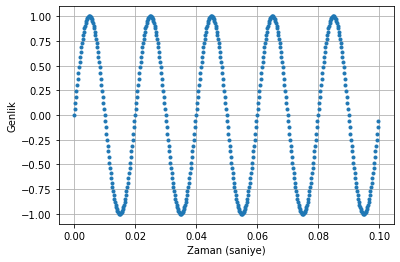

In [4]:
import matplotlib.pyplot as plt
plt.plot(t, dalga, '.') 
plt.grid();plt.xlabel('Zaman (saniye)');plt.ylabel('Genlik');

**UYGULAMA:**

Sinyalin negatif olan değerlerini sıfıra eşleyip (İng: half wave rectification) tekrar çizdiren kod parçası yazınız.

In [ ]:
# kodunuzu buraya yazınız

CEVAP:

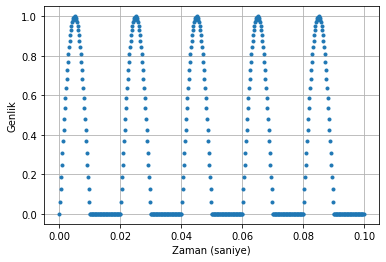

In [6]:
#@title
dalga[dalga < 0] = 0
plt.plot(t, dalga, '.')
plt.grid();plt.xlabel('Zaman (saniye)');plt.ylabel('Genlik');

**UYGULAMA:**

Aşağıda bir görüntü dosyasının okunup çizdirilmesiyle ilgili örnekler verilmiştir. Aralarda tanımlı küçük hedefleri gerçekleştiren kodları yazınız.

Matplotlib kütüphanesi ile görüntü çizdirme için hızlı yardım için [bakınız](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py).

Renkli bir görüntüyü dosyadan okuyup griye dönüştüreceğiz. Bu, bize iki boyutlu bir görüntü üzerinde çalışma imkanı verecek. 

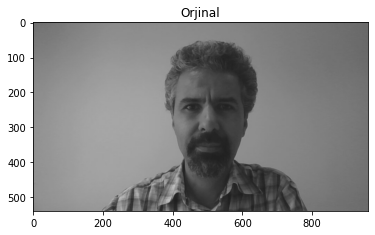

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import requests

# Resim dosyasının indirilmesi
link = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/photo.jpg'
r = requests.get(link, allow_redirects=True)
open('photo.jpg', 'wb').write(r.content)

# CV2 küyüphanesi ile görüntü okuma, renk dönüştürme işlemleri
goruntu_piksel_matrisi_renkli = cv2.imread('photo.jpg') # Görüntüyü dosyadan okuma

# Renkli görüntüyü griye dönüştürme. Bunu her piksel için tek sayı ile temsil 
#  elde edip uygulamamızı kolaylaştırmak için yapıyoruz
goruntu_piksel_matrisi_gri = cv2.cvtColor(goruntu_piksel_matrisi_renkli, cv2.COLOR_BGR2GRAY) 

# Görüntüyü çizdirme (çizdirebilmek için gri-görüntüyü tekrar geri dönüştürmemiz gerekti)
plt.imshow(cv2.cvtColor(goruntu_piksel_matrisi_gri, cv2.COLOR_GRAY2RGB)) 
plt.title('Orjinal');

Görüntümüz bir numpy-array içerisinde. Boyut bilgileri bize satır ve sütun sayısını verecektir

In [11]:
# Görüntünün boyutları
satirSayisi, sutunSayisi = goruntu_piksel_matrisi_gri.shape
print("Satır sayısı: ", satirSayisi)
print("Sutun sayısı: ", sutunSayisi)

Satır sayısı:  540
Sutun sayısı:  960


Uygulama 1 ) Görüntünün sol üst dörtte birlik bölümünü çizdiren bir kod parçası yazınız

In [ ]:
# kodunuzu buraya yazınız

ÇÖZÜM:

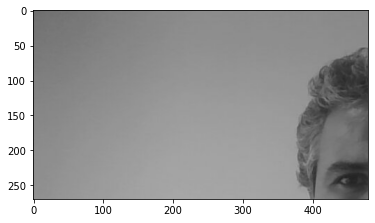

In [13]:
#@title
# Görüntünün ilk çeyreğini gösteren bir kod satırı yazınız
plt.imshow(cv2.cvtColor(goruntu_piksel_matrisi_gri[:satirSayisi//2,:sutunSayisi//2], cv2.COLOR_GRAY2RGB));

Görüntümüze biraz gürültü ekleyelim. 100 pixel'de rastgele seçilmiş bir tanesini 0 (koyu siyah) yaparak gürültü ekleyebiliriz

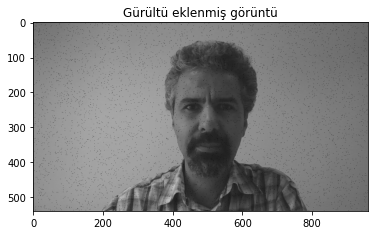

In [14]:
#Gürültü ekleme: her 100 pixel'den birisini 0'a eşleyerek görüntümüzü bozalım
for i in range(satirSayisi):
  for j in range(sutunSayisi):
    if(np.random.random() < 0.01):
      goruntu_piksel_matrisi_gri[i,j]=0

#Gürültülü görüntüyü çizdirelim
plt.imshow(cv2.cvtColor(goruntu_piksel_matrisi_gri, cv2.COLOR_GRAY2RGB))
plt.title('Gürültü eklenmiş görüntü');

Uygulama - 2) Gürültüyü median filtre ile kaldıran bir kod parçası yazınız. Bunun için yapmanız gereken; her piksel için, piksel değerini ve çevresindeki değerleri taşıyan bir dizinin medyan değerini bulup, bunu yeni piksel değeri olarak atamak. 

Örnek: Aşağıdaki örnekte hedef, merkezdeki 70 değerini taşıyan pikselin değerini değiştirmek. Önce pikselin kendisi ve çevresindeki tüm değerlerle beraber bir dizi oluşturuluyor. Daha sonra dizideki değerlerin sıraya dizilmesi ve ortadaki değerin alınmasıyla medyan değerine erişiliyor ve bu değer merkezdeki pikselin yeni değeri olarak atanıyor (sıraya dizme ve ortanca bulma işlemini np.median() ile gerçekleştirebilirsiniz). Bu işlem, çok düşük veya çok yüksek değerlerin yerine daha orta düzey değerler yerleştirilerek görüntünün uç değerlerden filtrelenmesini sağlayacaktır.

Bu işlemi görüntünün sınır pikselleri hariç tüm pikselleri için yapan bir kod parçası yazınız.

![Medyan filtre grafik açıklama](https://www.researchgate.net/profile/Benjamin_Weyori/publication/280925268/figure/fig1/AS:391477344653326@1470346880378/A-graphical-depiction-of-the-median-filter-operation.png)

In [ ]:
# kodunuzu buraya yazınız

ÇÖZÜM:

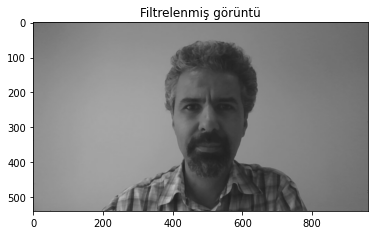

In [16]:
#@title
filtrelenmis_matris = goruntu_piksel_matrisi_gri.copy() # önce kopyasını oluşturalım
for i in range(1, satirSayisi-1): # sınır değerleri dışarıda bırakacak şekilde endeks seçiyoruz
  for j in range(1, sutunSayisi-1):
    # i,j konumundaki piksel merkezde kalacak şekilde 3x3 matris oluşturma
    merkez_ve_cevresi = goruntu_piksel_matrisi_gri[i-1:i+2, j-1:j+2]
    # alınan küçük matrisin medyan değerinin i,j konumuna yerleştirilmesi
    filtrelenmis_matris[i,j] = np.median(merkez_ve_cevresi)

# Çizdirme
plt.imshow(cv2.cvtColor(filtrelenmis_matris, cv2.COLOR_GRAY2RGB))
plt.title('Filtrelenmiş görüntü');

Benzer görüntü işleme örnekleri için bakınız: 
*   https://lodev.org/cgtutor/filtering.html
*   http://scipy-lectures.org/advanced/image_processing/ 


**Kaynaklar:**

*   https://docs.scipy.org/doc/numpy/user/quickstart.html
*   https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf
*   https://www.youtube.com/watch?v=V0D2mhVt7NE
*   http://www.ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html
*   https://www.youtube.com/watch?v=ZB7BZMhfPgk , https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019


**Yazar:** Barış Bozkurt, **editör:** Ahmet Uysal

---